Heart diseases prediction

EDA and data preprocessing

In [77]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, RocCurveDisplay

In [7]:
# General settings 
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [8]:
# Getting dataset
data = pd.read_csv('Data/framingham.csv')

In [9]:
# First look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [10]:
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
data.tail()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [12]:
data.sample(5)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3783,0,60,4.0,0,0.0,0.0,0,0,0,247.0,131.0,81.0,22.19,95.0,94.0,1
367,1,59,1.0,0,0.0,0.0,0,0,0,282.0,114.0,67.0,28.04,58.0,79.0,1
1480,0,39,3.0,0,0.0,0.0,0,0,0,194.0,115.0,70.0,25.73,70.0,54.0,0
522,1,62,4.0,1,40.0,0.0,0,1,0,203.0,148.0,96.0,30.84,70.0,95.0,1
2157,1,54,1.0,0,0.0,0.0,0,0,0,260.0,116.0,77.0,28.56,57.0,61.0,0


In [13]:
# Missing values analysis
data.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True)

In [15]:
data.isna().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
data.shape

(3658, 16)

In [18]:
# Duplicate values
data.duplicated().sum()

0

In [20]:
data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


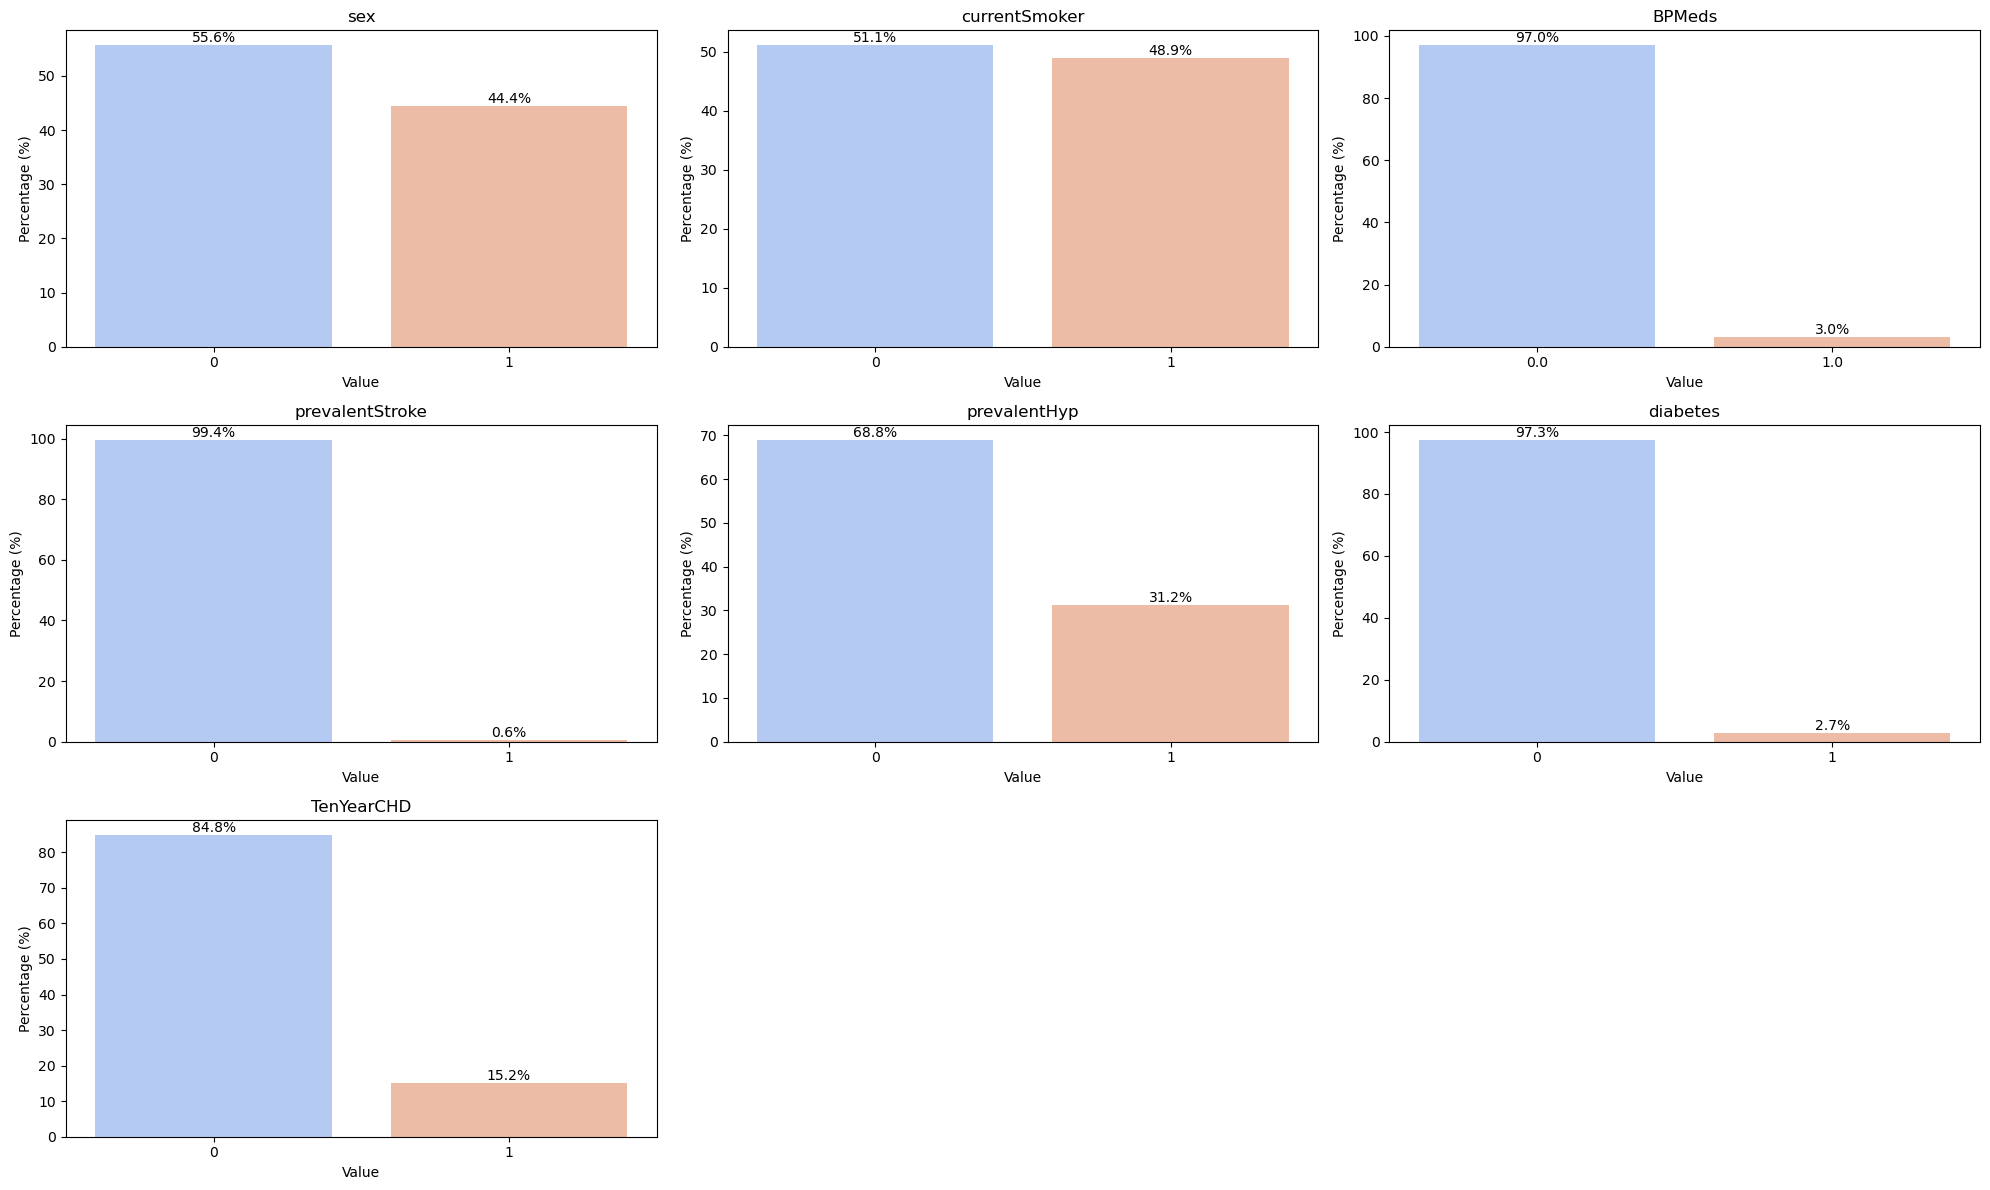

In [58]:
# % bar chart grid for each variable to examine outliers, error data values and feature distribution

# Intiger columns list 
cat_columns = [col for col in data.columns if col in ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']]


# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(cat_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating plots
for i, col in enumerate(cat_columns):
    # % for each value (0/1)
    percent_data = data[col].value_counts(normalize=True) * 100
    sns.barplot(
        x=percent_data.index,
        y=percent_data.values,
        ax=axes[i],
        palette="coolwarm",
    )
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Percentage (%)", fontsize=10)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha="center", va="bottom", fontsize=10)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

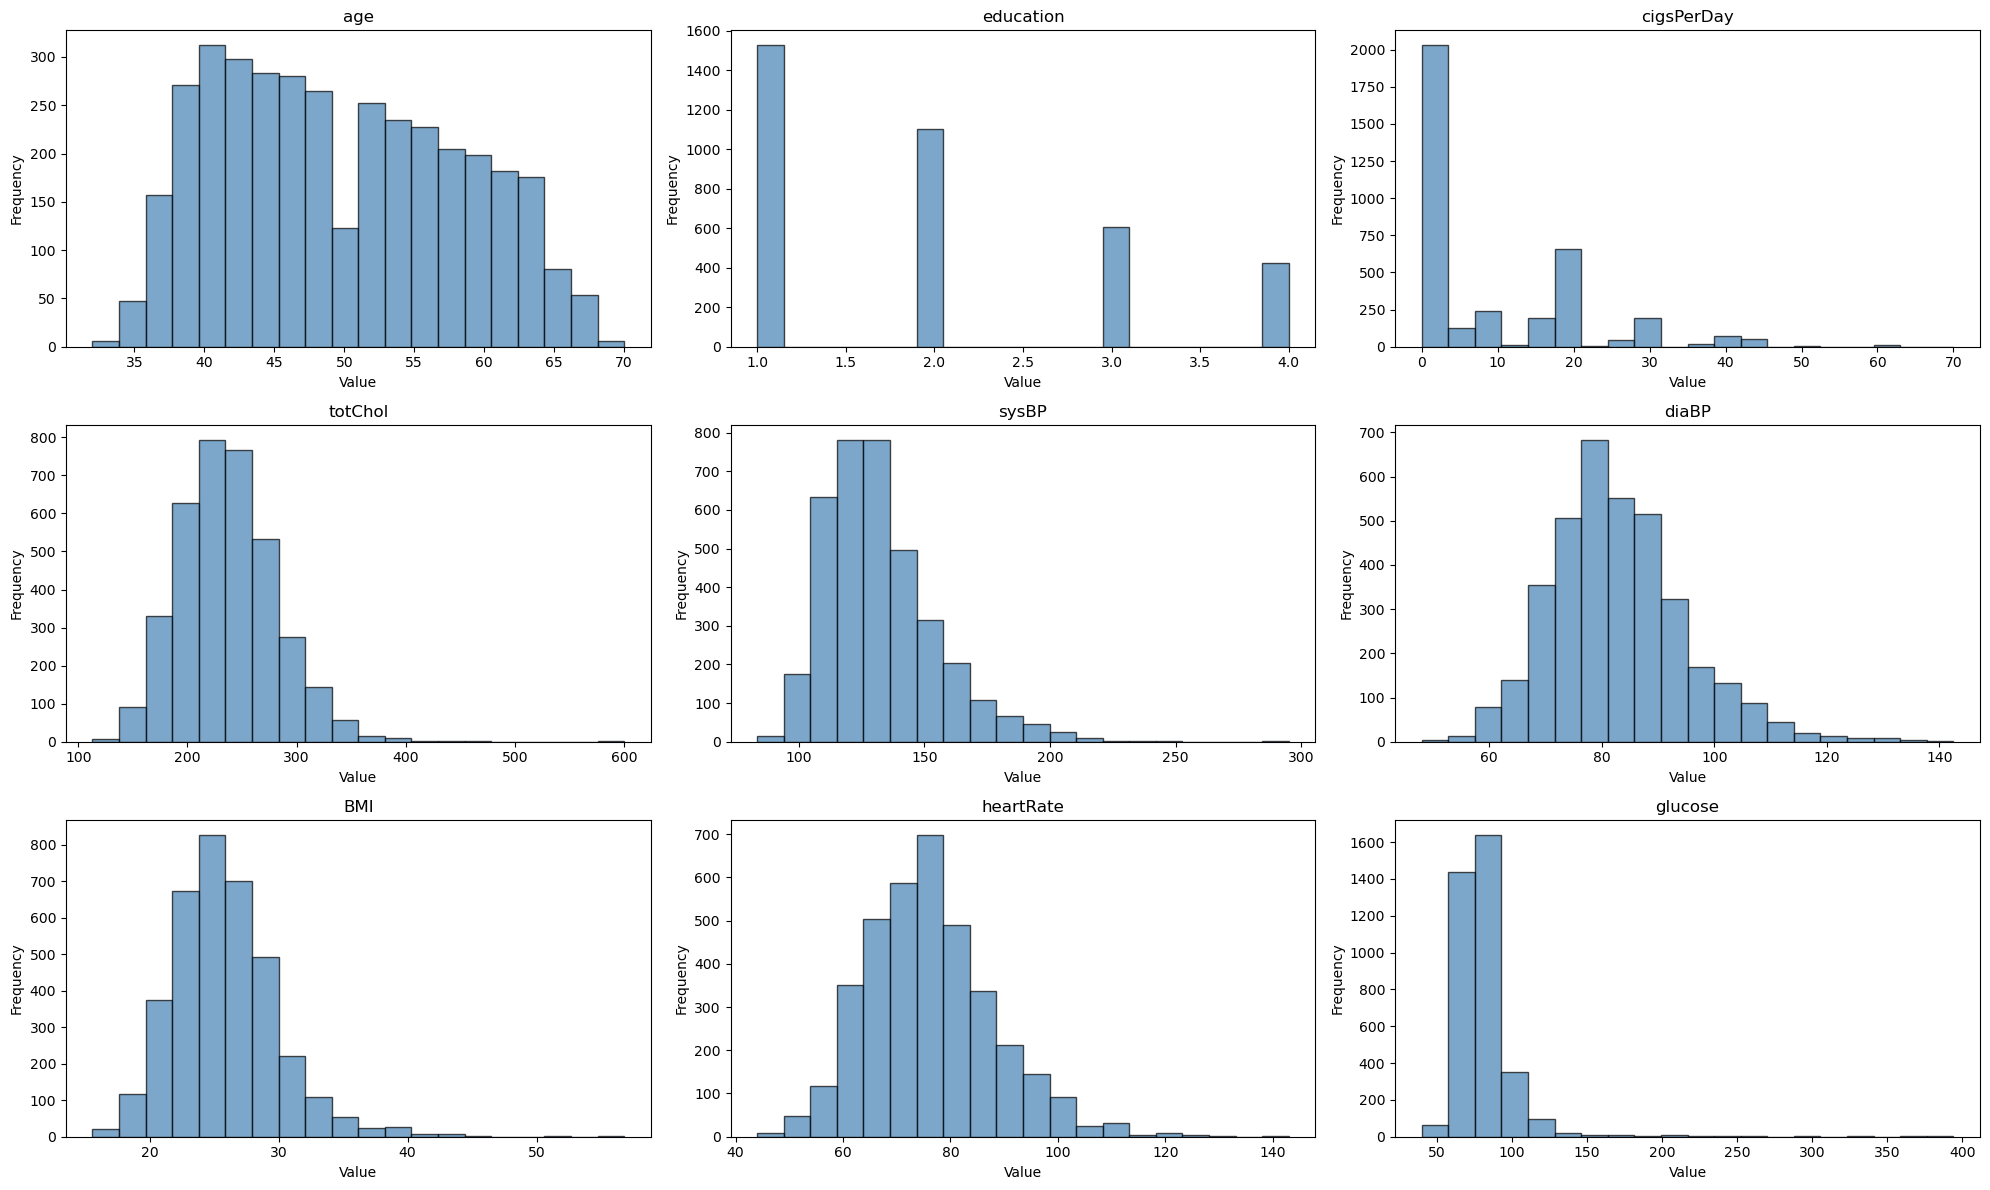

In [59]:
# List of columns
num_columns = [
    col for col in data.columns 
    if col in ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
]

# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(num_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating histograms
for i, col in enumerate(num_columns):
    axes[i].hist(data[col], bins=20, color="steelblue", edgecolor="black", alpha=0.7)
    
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [60]:
num_columns_df = data[['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

cat_columns_df = data[['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

target_column_df = data['TenYearCHD']

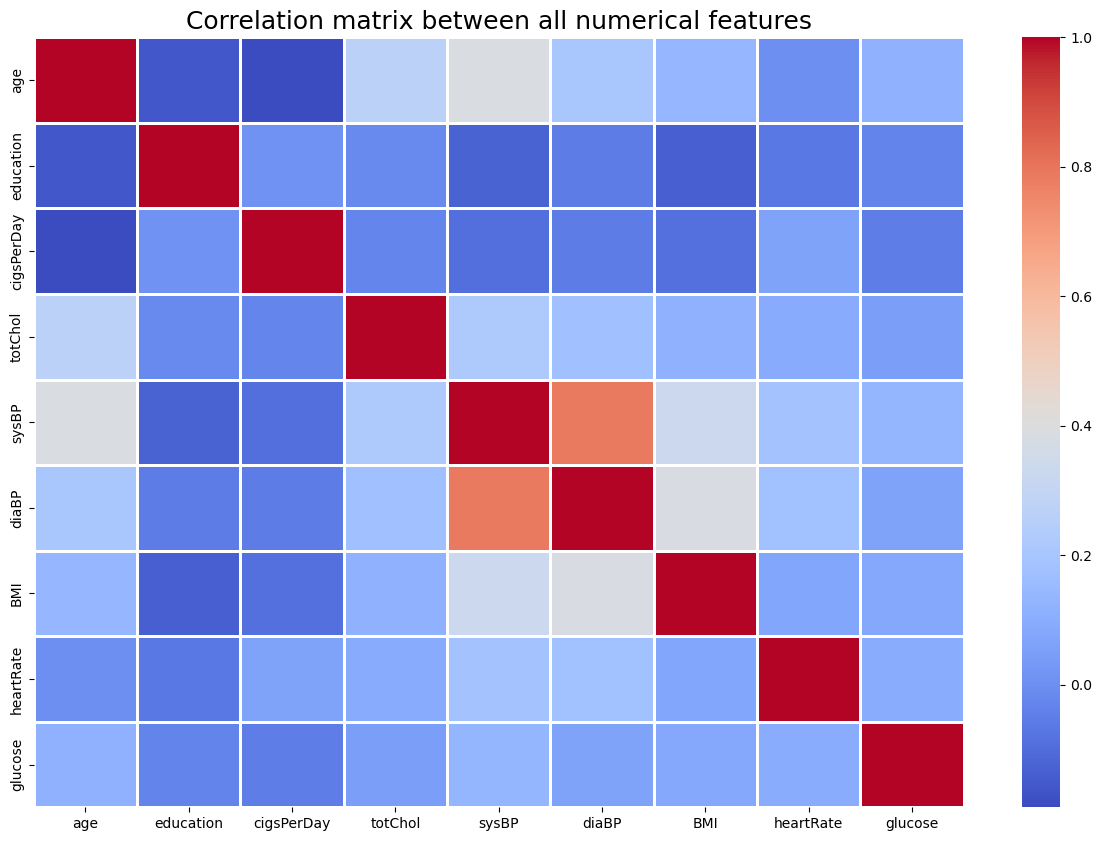

In [61]:
# linear correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(num_columns_df.corr(), cmap='coolwarm', linewidths=2)
plt.title('Correlation matrix between all numerical features', fontsize=18)
plt.show()

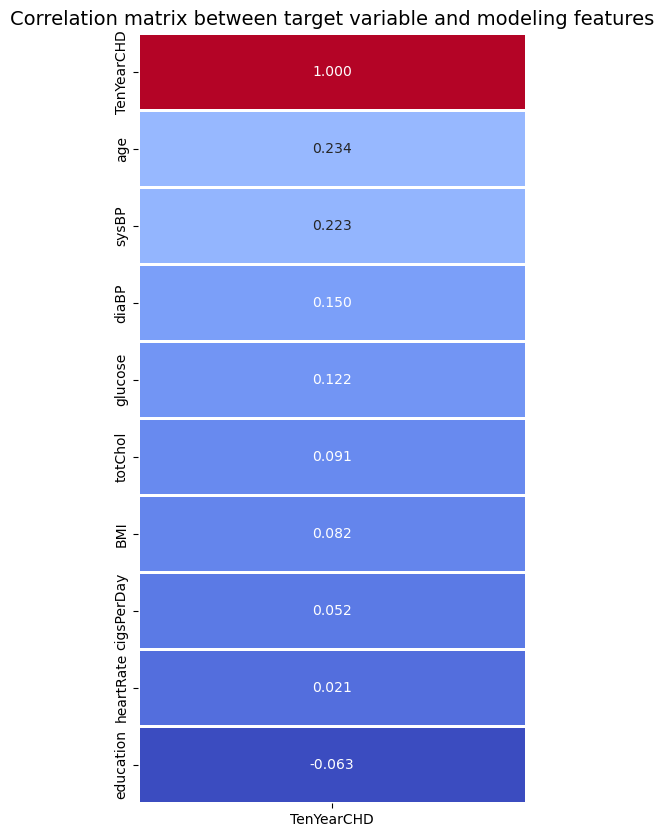

In [62]:
correlation_df = pd.concat([num_columns_df, target_column_df], axis=1)

correlation_matrix = correlation_df.corr()

TenYearCHD_correlation = correlation_matrix['TenYearCHD'].sort_values(ascending=False)

plt.figure(figsize=(5, 10))
sns.heatmap(TenYearCHD_correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, cbar=False, fmt='.3f')
plt.title('Correlation matrix between target variable and modeling features', fontsize=14)
plt.show()

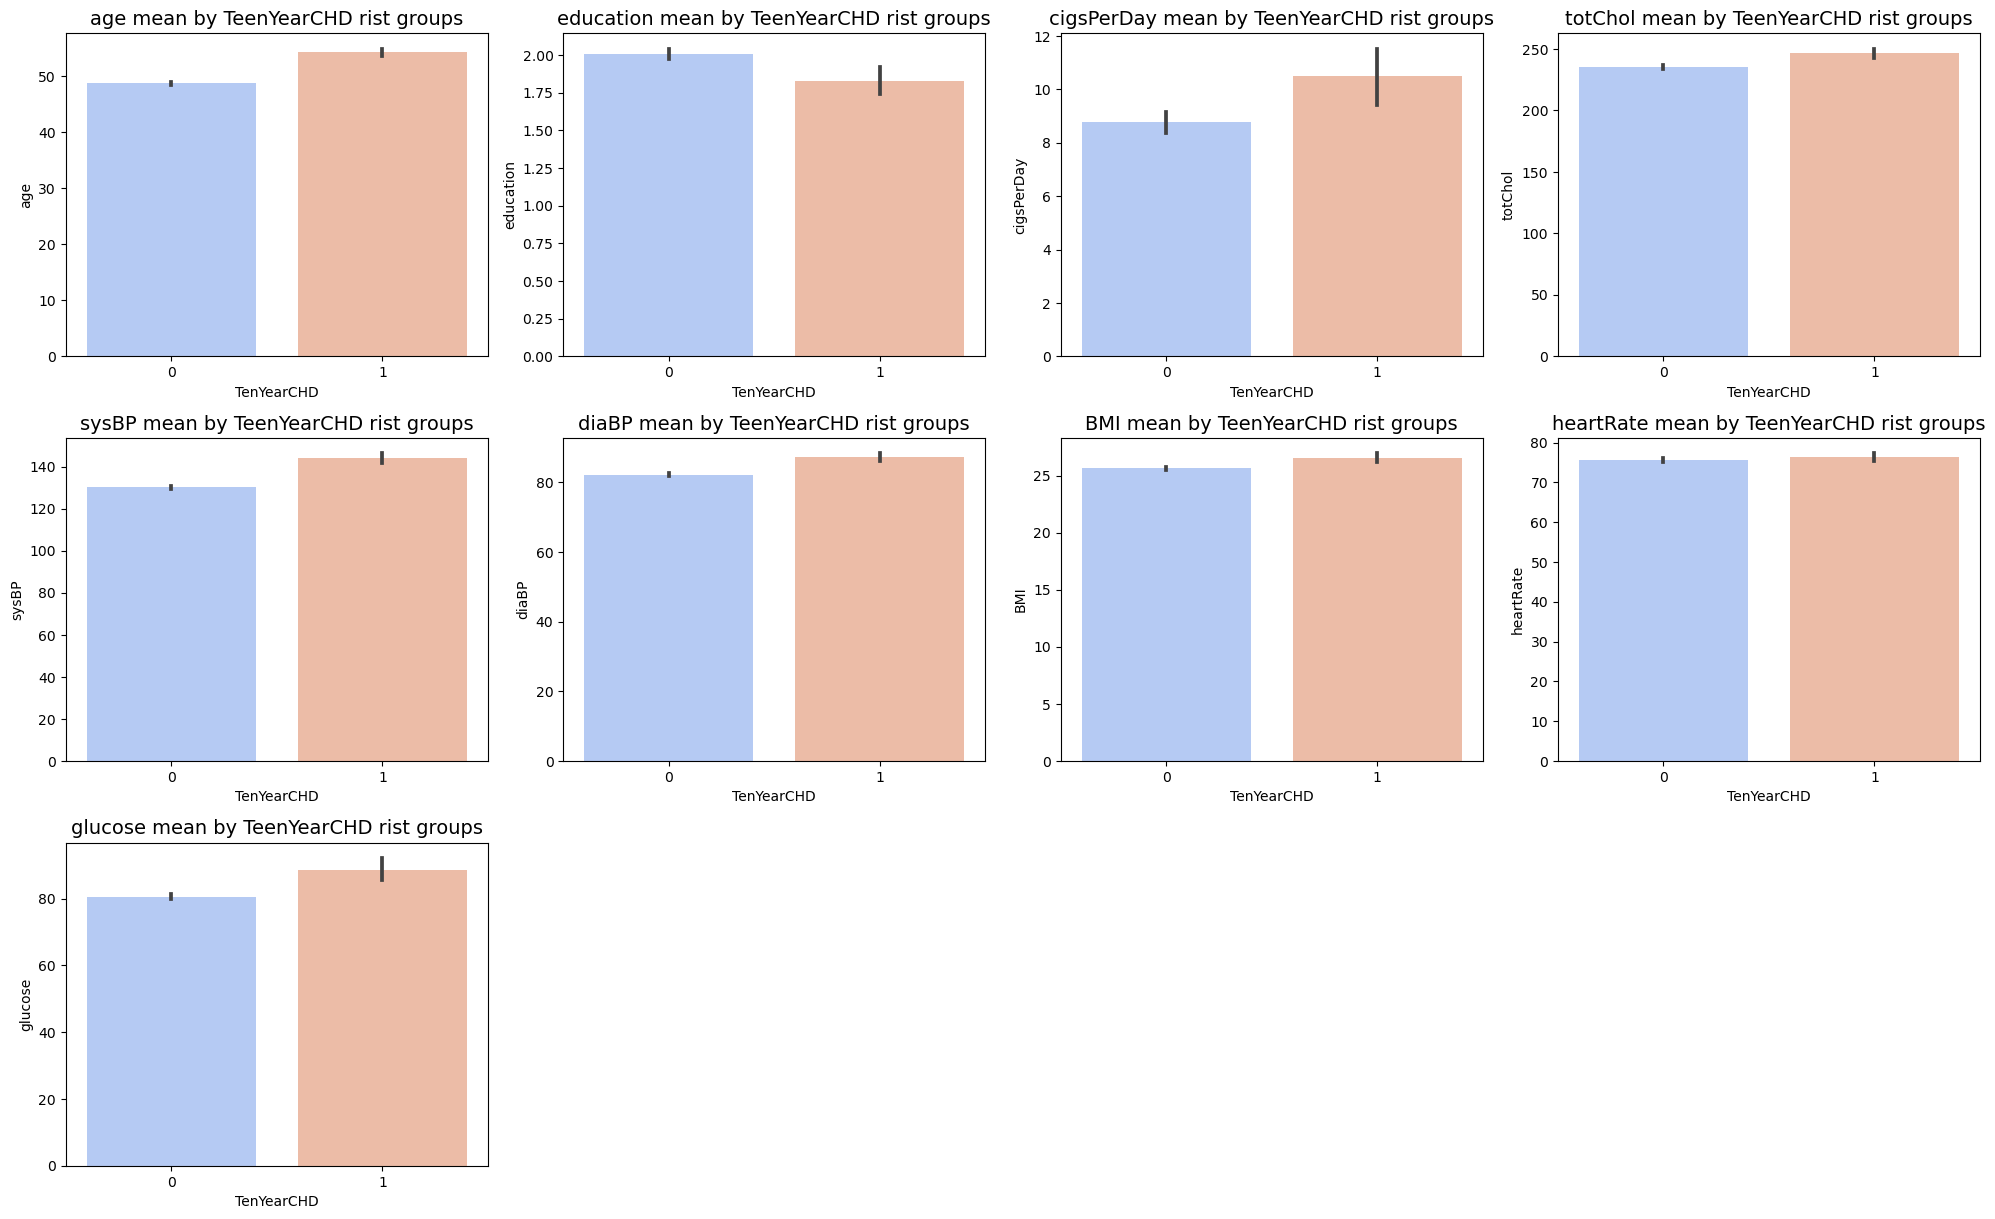

In [63]:
# Mean bar chart grid for each variable to examine differences between 10-year risk of coronary heart disease groups. The line in the bars indicates the 95% confidence interval

n_cols = 4 
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(num_columns):
    sns.barplot(
        x='TenYearCHD', 
        y=col, 
        data=data, 
        ax=axes[i], 
        palette='coolwarm',
        ci=95  
    )
    axes[i].set_title(f'{col} mean by TeenYearCHD rist groups', fontsize=14)
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

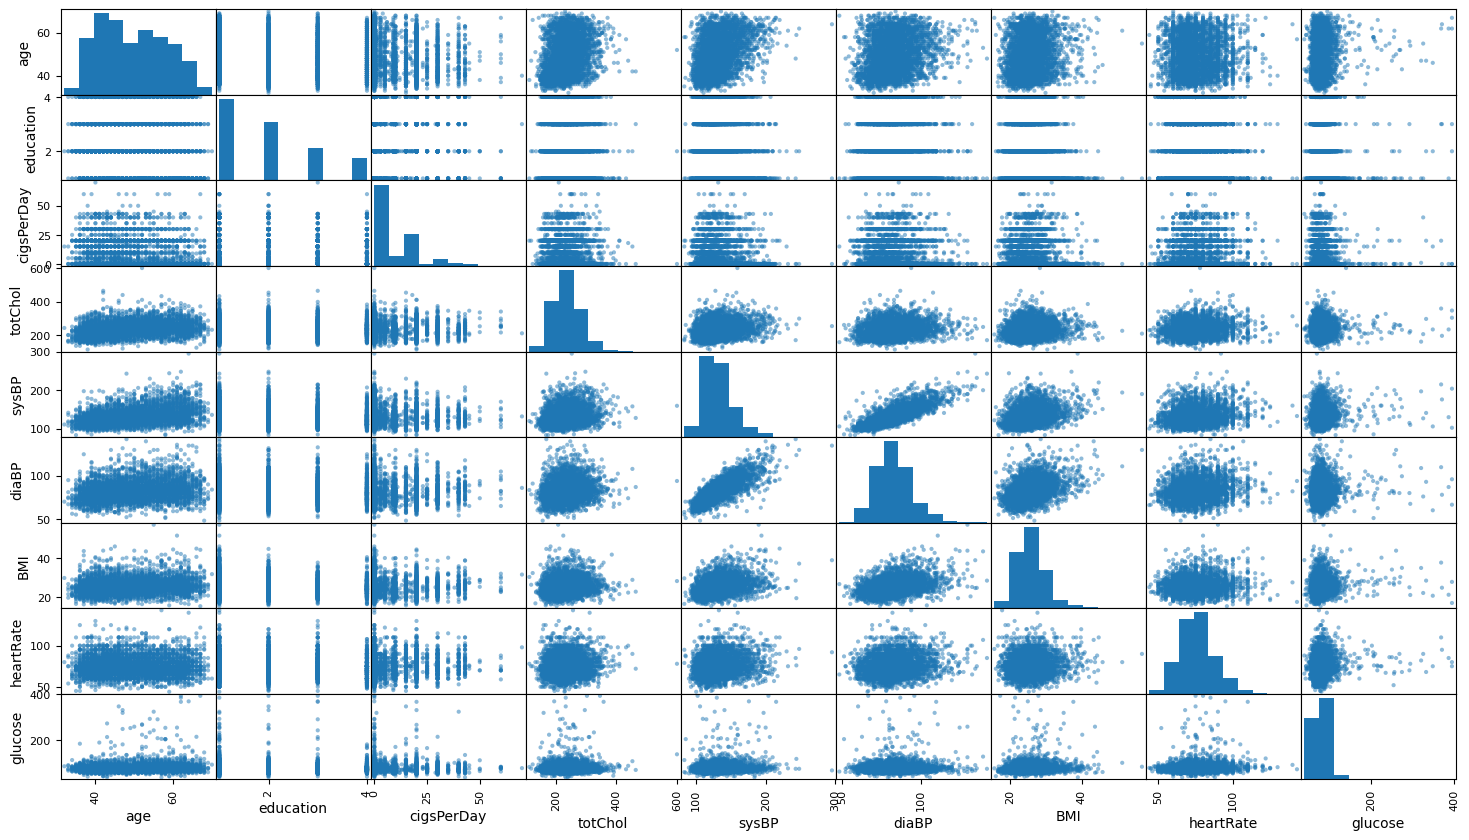

In [64]:
scatter_matrix(num_columns_df,figsize=(18,10))
plt.show()

Information Value of each column

In [47]:
# function to calculate Information Value and Weight of Evidence
# WoE = ln(Non_event_percentage/Event_percentage)
# IV = sigma(Event_percentage - Non_event_percentage) * WoE
# Event is probe when we have patient with one of our targeted diseases
# Non-event is probe when we have patient with one of our targeted diseases

def iv_calc(data, target, bins=10, woe_show=True):
    
    # Data frames to fill
    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    
    # Independent variables list
    col_list = data.columns
    
    # WOE and IV calculation for each independent variable
    for col in col_list[~col_list.isin([target])]:
        if (data[col].dtype.kind in 'bifc') and (len(np.unique(data[col])) > 10):
            binned_x = pd.qcut(data[col], bins, duplicates='drop') # binned_x is to balance number of observation in each bin, so WoE wouldn't be biased
            d_temp = pd.DataFrame({'x': binned_x,
                                   'y': data[target]})
        else:
            d_temp = pd.DataFrame({'x': data[col],
                                   'y': data[target]})
            
        # Number of events in each group (bin)
        d = d_temp.groupby('x', as_index=False).agg({
            'y': ['count','sum']})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Percentage of events in each group (bin)
        d['Event_percentage'] = d['Events']/d['Events'].sum()
        
        # Non-events in each group (bin)
        d['Non_events'] = np.abs(d['N'] - d['Events'])
        # Non-events percentage in each group
        d['Non_event_percentage'] = d['Non_events']/d['Non_events'].sum()
        
        # WoE calculation 
        d['WoE'] = np.log(d['Event_percentage']/d['Non_event_percentage'])
        d['IV'] = d['WoE'] * (d['Event_percentage'] - d['Non_event_percentage'])
        d.insert(loc=0, column='Variable', value=col)
        tmp = pd.DataFrame({'Variable': [col],
                            'IV': [d['IV'].sum()]},
                            columns = ['Variable','IV'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
        
        # Whether to show WoE data frame
        if woe_show == True:
            print(woe_df)
    
    return iv_df, woe_df

In [50]:
# calculation of Information Value for variables in our dataset
iv_df = iv_calc(data=data, target='TenYearCHD', bins=10, woe_show=False)[0]
iv_df[(iv_df['IV'] >= 0.01) & (iv_df['IV'] <= 0.5)]

,Variable,IV
0,sex,0.064688
0,age,0.472370
0,education,0.065704
0,cigsPerDay,0.024913
0,BPMeds,0.045473
0,prevalentStroke,0.012628
0,prevalentHyp,0.234698
0,diabetes,0.048841
0,totChol,0.078902
0,sysBP,0.336415


Feature scalling

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Skopiowanie danych
scaled_data = data.copy()

# Inicjalizacja skalera
min_max_scaler = MinMaxScaler()

# Skalowanie tylko zmiennych numerycznych
scaled_data[num_columns] = min_max_scaler.fit_transform(data[num_columns])


In [66]:
scaled_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,1.000000,0,0.000000,0.0,0,0,0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,0.333333,0,0.000000,0.0,0,0,0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,0.000000,1,0.285714,0.0,0,0,0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,0.666667,1,0.428571,0.0,0,1,0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,0.666667,1,0.328571,0.0,0,0,0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0


In [67]:
scaled_data['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

Classification model based on Logistic Regression

Confusion Matrix:
[[648 283]
 [ 51 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       931
           1       0.29      0.69      0.41       167

    accuracy                           0.70      1098
   macro avg       0.61      0.70      0.60      1098
weighted avg       0.83      0.70      0.74      1098

AUC Score: 0.746


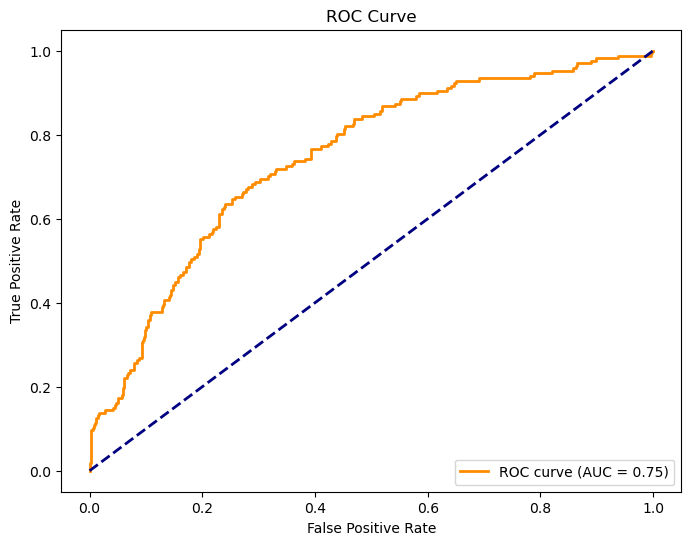


Feature Importance:
            Feature  Importance
1               age    2.316119
10            sysBP    2.098518
9           totChol    1.402025
4        cigsPerDay    1.196831
14          glucose    1.079124
12              BMI    0.546322
0               sex    0.451908
8          diabetes    0.377923
7      prevalentHyp    0.338532
11            diaBP    0.335327
6   prevalentStroke    0.299899
5            BPMeds    0.191910
3     currentSmoker    0.074067
2         education   -0.313849
13        heartRate   -0.324447

Probability Predictions (example of 10 cases):
      Actual  Predicted  Probability
2579       0          0     0.391027
3726       0          0     0.496207
2182       0          0     0.490881
4          0          0     0.359390
536        0          0     0.338878
6          1          1     0.554156
2746       1          0     0.228555
1703       0          0     0.400268
978        1          1     0.713876
2592       0          0     0.130974


In [79]:
# Splitting the data into features (X) and target variable (y)
X = scaled_data.drop('TenYearCHD', axis=1)
y = scaled_data['TenYearCHD']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Logistic regression model
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions and probability predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 1. Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 2. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Calculate AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.3f}")

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Feature importance (model coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# 6. Probability predictions
predictions_with_probabilities = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_prob
})
print("\nProbability Predictions (example of 10 cases):")
print(predictions_with_probabilities.head(10))


Confusion Matrix:
[[644 287]
 [ 53 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       931
           1       0.28      0.68      0.40       167

    accuracy                           0.69      1098
   macro avg       0.60      0.69      0.60      1098
weighted avg       0.83      0.69      0.73      1098

AUC Score: 0.743


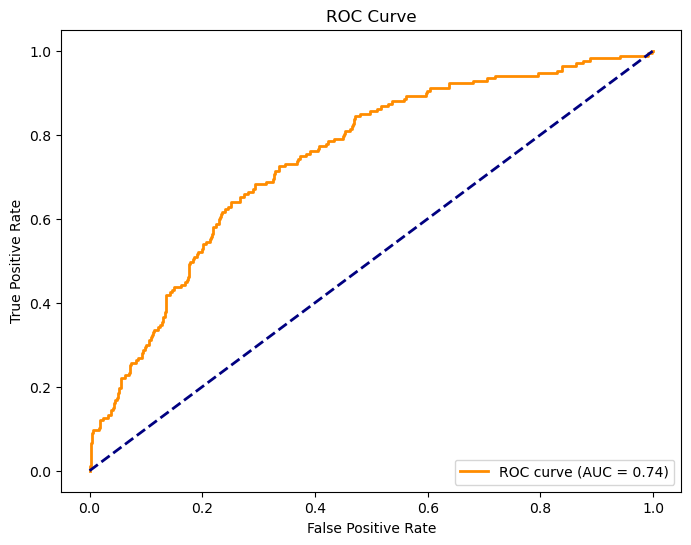


Feature Importance:
            Feature  Importance
1               age    2.790364
14          glucose    2.043446
10            sysBP    1.982227
4        cigsPerDay    1.367835
9           totChol    1.274110
12              BMI    0.582729
0               sex    0.474170
11            diaBP    0.416129
7      prevalentHyp    0.295461
5            BPMeds    0.174780
3     currentSmoker    0.025133
13        heartRate   -0.434234
8          diabetes   -0.466027
2         education   -0.501392
6   prevalentStroke   -0.575932

Probability Predictions (example of 10 cases):
      Actual  Predicted  Probability
2579       0          0     0.409583
3726       0          0     0.474240
2182       0          0     0.472374
4          0          0     0.332124
536        0          0     0.288965
6          1          1     0.615120
2746       1          0     0.198369
1703       0          0     0.379261
978        1          1     0.733793
2592       0          0     0.108584


In [82]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Splitting the data into features (X) and target variable (y)
X = scaled_data.drop('TenYearCHD', axis=1)
y = scaled_data['TenYearCHD']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic regression model with balanced class weights
model = LogisticRegression(random_state=42, class_weight='balanced')

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predictions and probability predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 1. Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 2. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Calculate AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.3f}")

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Feature importance (model coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# 6. Probability predictions
predictions_with_probabilities = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_prob
})
print("\nProbability Predictions (example of 10 cases):")
print(predictions_with_probabilities.head(10))
